In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from tqdm.auto import tqdm
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsClassifier
from numpy.linalg import norm
import seaborn as sns

In [144]:
df = pd.read_csv('Train.csv')

In [3]:
df.shape

(3132, 9)

In [4]:
# label_encoder object knows 
# how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
df['A']= label_encoder.fit_transform(df['A'])
  
df['A'].unique()

array([0, 2, 1])

In [5]:
df['A'].value_counts()
#balanced, can use K Nearest Neighbors

A
2    1149
1     992
0     991
Name: count, dtype: int64

In [6]:
#Importing and encoding test.csv
test = pd.read_csv('Test.csv')
test['A'] = label_encoder.transform(test['A'])
test.head()

Index  A      B      C      D       E       F       G      H
0    866  2  0.605  0.455  0.160  1.1035  0.4210  0.3015  0.325
1   1483  2  0.590  0.440  0.150  0.8725  0.3870  0.2150  0.245
2    599  0  0.560  0.445  0.195  0.9810  0.3050  0.2245  0.335
3   1702  0  0.635  0.490  0.170  1.2615  0.5385  0.2665  0.380
4    670  2  0.475  0.385  0.145  0.6175  0.2350  0.1080  0.215

In [7]:
submission = pd.DataFrame(np.zeros((test.shape[0],2)), columns=['Index','Target'])

In [8]:
submission['Index'] = test['Index']

In [9]:
test.drop(['Index'], inplace=True, axis=1)

# Data Preprocessing and EDA

In [10]:
df.describe()

A            B            C            D            E   
count  3132.000000  3132.000000  3132.000000  3132.000000  3132.000000  \
mean      1.050447     0.525750     0.409254     0.140070     0.834224   
std       0.825192     0.119131     0.098557     0.042661     0.491449   
min       0.000000     0.075000     0.055000     0.000000     0.002000   
25%       0.000000     0.450000     0.350000     0.115000     0.444000   
50%       1.000000     0.545000     0.425000     0.145000     0.804500   
75%       2.000000     0.615000     0.480000     0.165000     1.156750   
max       2.000000     0.815000     0.650000     1.130000     2.825500   

                 F            G            H       Target  
count  3132.000000  3132.000000  3132.000000  3132.000000  
mean      0.362219     0.181684     0.240351     9.964879  
std       0.223000     0.109317     0.139567     3.229146  
min       0.001000     0.000500     0.001500     1.000000  
25%       0.187000     0.093500     0.130000     8.000000  
50%       0.339500     0.171750     0.235000    10.000000  
75%       0.506500     0.255000     0.330000    11.000000  
max       1.488000     0.760000     1.005000    29.000000

In [11]:
from scipy.stats import zscore

In [12]:
dfz = []
dfz = df[['A','B','C','D','E','F','G','H']].apply(zscore)

In [13]:
dfz.head()

A         B         C         D         E         F         G   
0 -1.273176  0.749291  0.464226 -0.118869  0.457447  0.499098  0.743973  \
1 -1.273176 -0.090254 -0.144654 -0.001647 -0.301655 -0.364269 -0.514040   
2  1.150889  1.127086  1.225326  0.818910  1.523852  1.692114  1.544526   
3  1.150889 -0.593980 -0.449095 -1.056649 -0.651696 -0.617673 -0.738195   
4  1.150889 -0.258163 -0.093914  0.350020 -0.052352 -0.572823 -0.605532   

          H  
0  0.241135  
1 -0.145838  
2  1.179902  
3 -0.647469  
4  0.785763

In [14]:
df.head()

A      B      C      D       E       F       G      H  Target
0  0  0.615  0.455  0.135  1.0590  0.4735  0.2630  0.274       9
1  0  0.515  0.395  0.140  0.6860  0.2810  0.1255  0.220      12
2  2  0.660  0.530  0.175  1.5830  0.7395  0.3505  0.405      10
3  2  0.455  0.365  0.095  0.5140  0.2245  0.1010  0.150      15
4  2  0.495  0.400  0.155  0.8085  0.2345  0.1155  0.350       6

In [15]:
dfz.isnull().sum()

A    0
B    0
C    0
D    0
E    0
F    0
G    0
H    0
dtype: int64

In [16]:
dfz.nunique()

A       3
B     132
C     107
D      51
E    2043
F    1381
G     838
H     818
dtype: int64

In [17]:
df['Target'].value_counts()

Target
9     511
10    469
8     441
11    371
7     280
12    201
6     199
13    158
14     94
15     80
5      76
16     51
17     46
4      41
18     27
19     25
20     22
3      12
21     11
23      5
22      3
27      2
24      2
29      1
2       1
26      1
1       1
25      1
Name: count, dtype: int64

Since the number of possible targets is much lower than number of samples, we can try classification also!

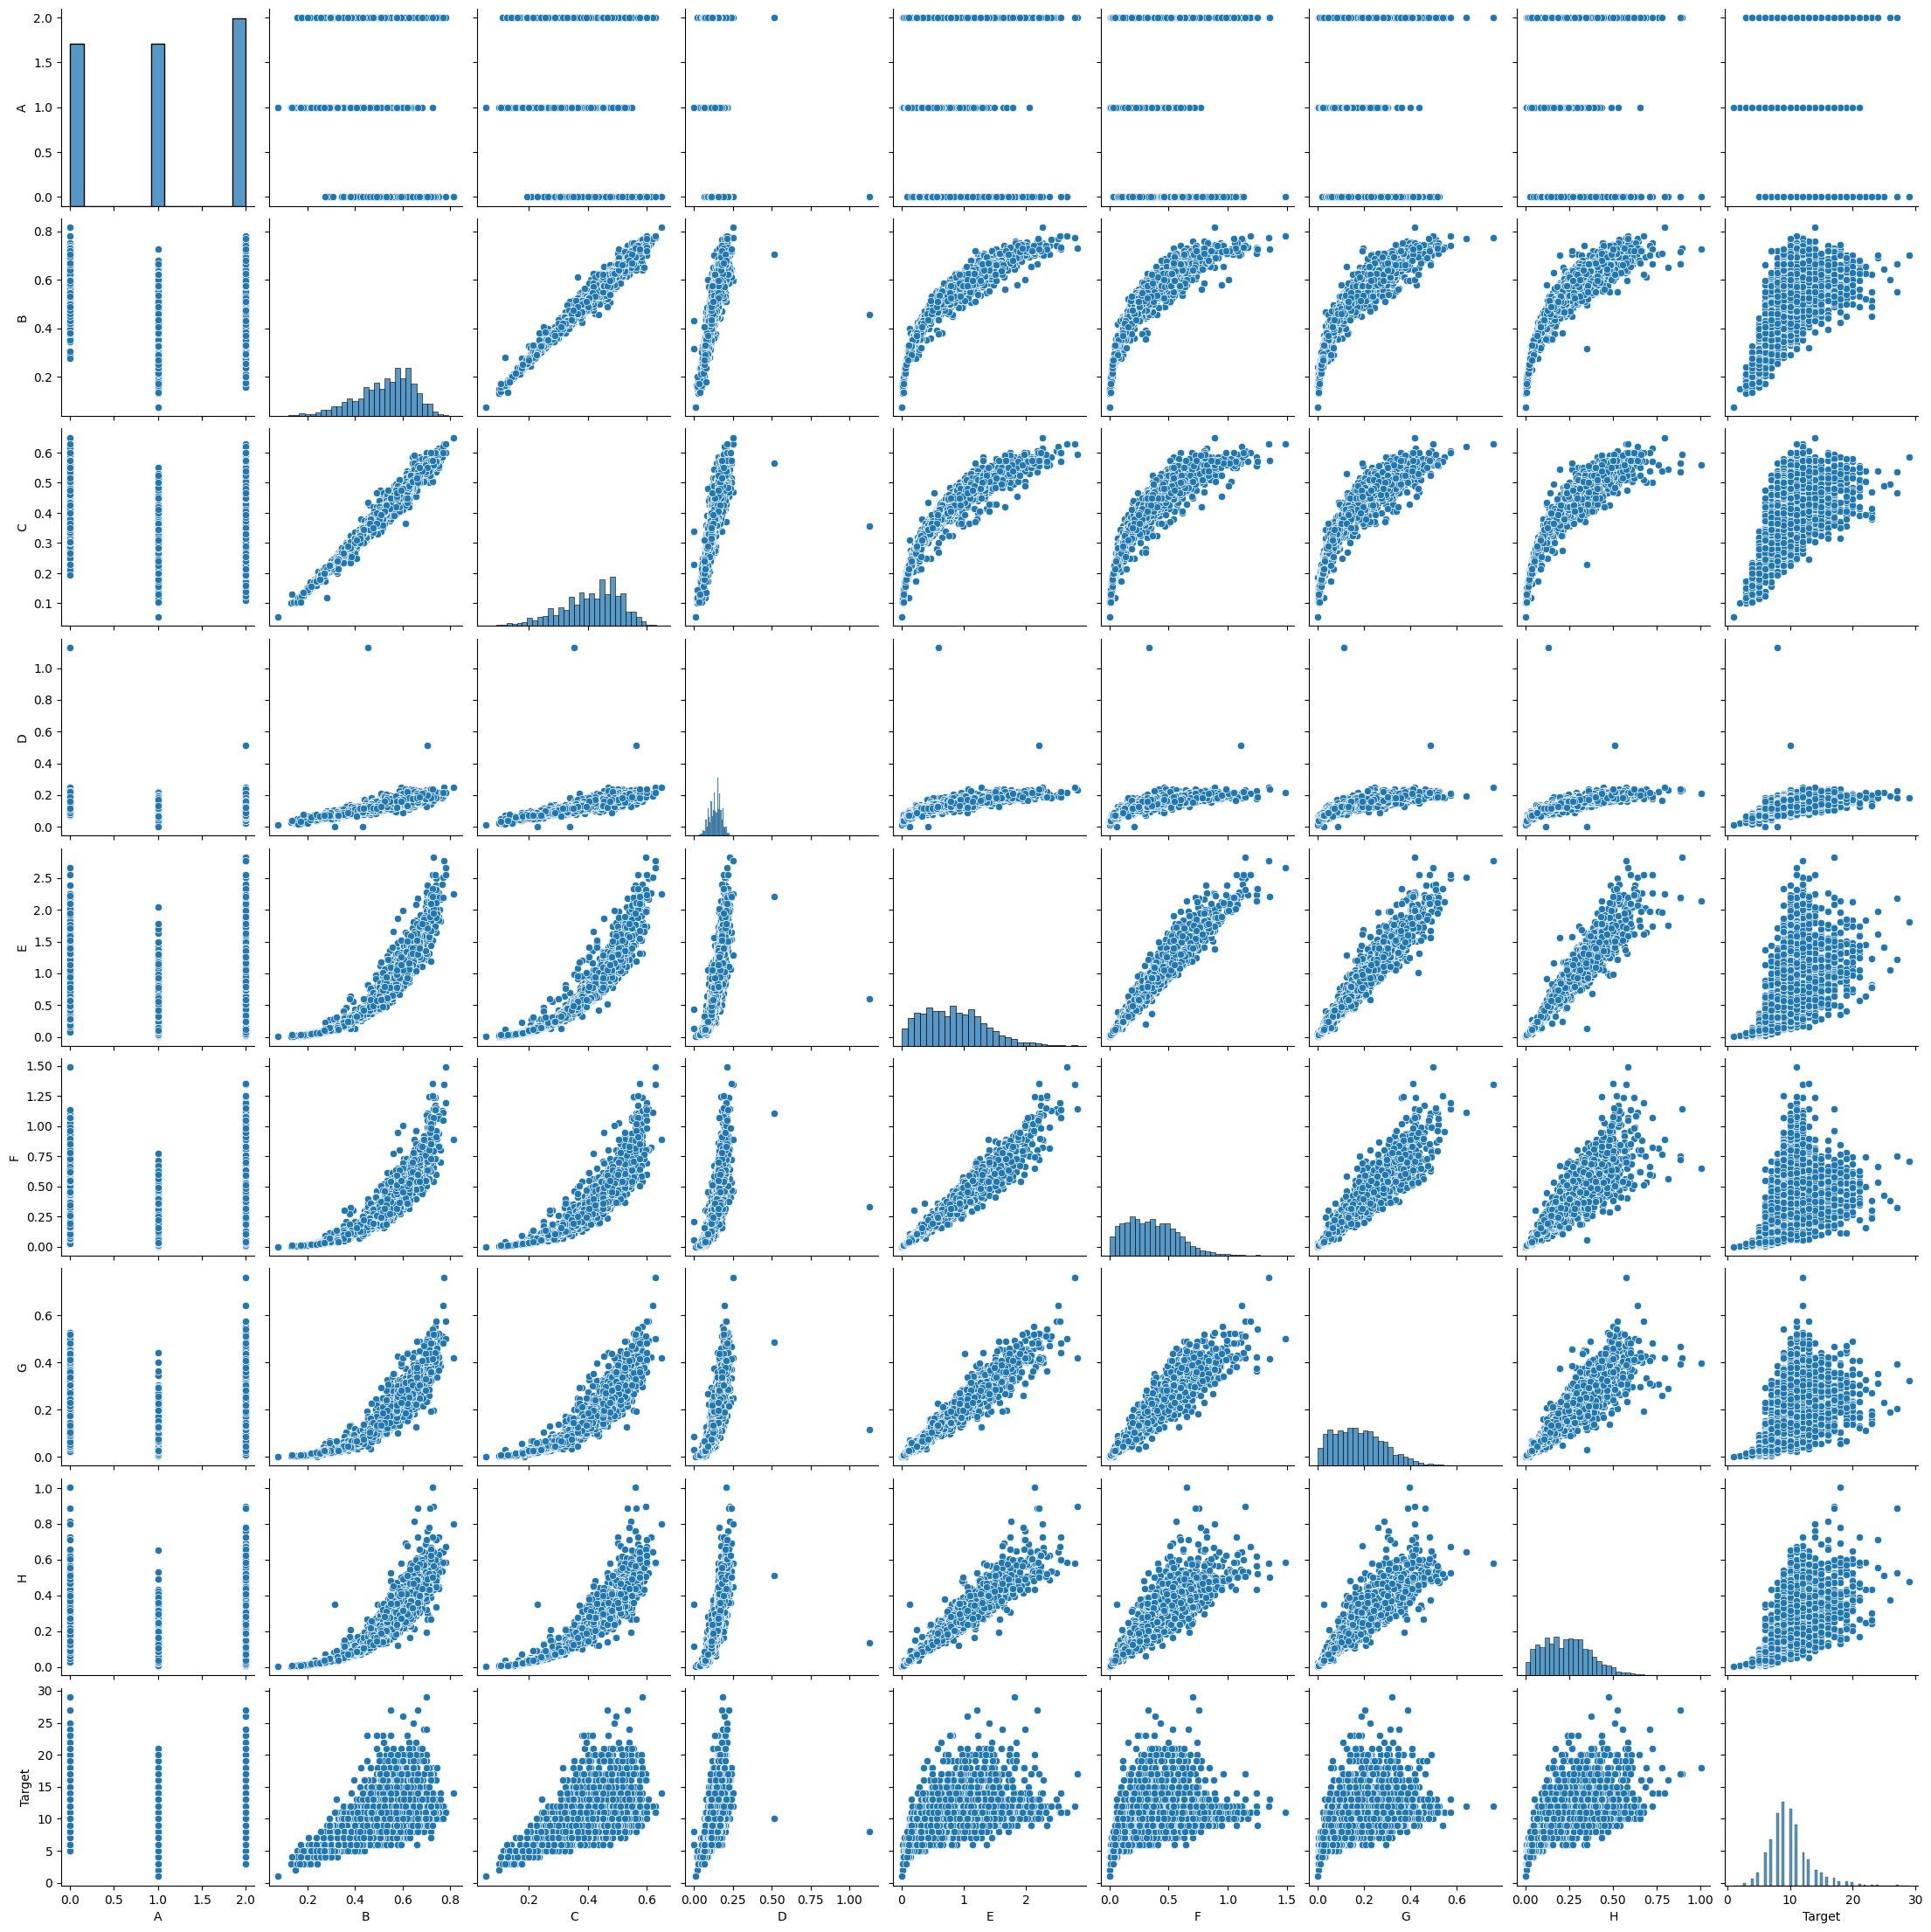

In [23]:
sns.pairplot(df)

In [18]:
dfz.corr()

A         B         C         D         E         F         G   
A  1.000000 -0.039729 -0.044189 -0.044284 -0.018214  0.002973 -0.031274  \
B -0.039729  1.000000  0.987318  0.806793  0.926680  0.901322  0.904783   
C -0.044189  0.987318  1.000000  0.812538  0.926818  0.896775  0.902114   
D -0.044284  0.806793  0.812538  1.000000  0.802041  0.760783  0.782809   
E -0.018214  0.926680  0.926818  0.802041  1.000000  0.970864  0.965888   
F  0.002973  0.901322  0.896775  0.760783  0.970864  1.000000  0.932990   
G -0.031274  0.904783  0.902114  0.782809  0.965888  0.932990  1.000000   
H -0.033297  0.897411  0.904471  0.796733  0.955928  0.884480  0.906051   

          H  
A -0.033297  
B  0.897411  
C  0.904471  
D  0.796733  
E  0.955928  
F  0.884480  
G  0.906051  
H  1.000000

In [19]:
X_train, X_test, y_train, y_test = train_test_split(dfz, df['Target'], test_size=0.3, random_state=0)

# Regression Algorithms

## Linear Regression (Simple)

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
lr = LinearRegression()

In [22]:
lr.fit(X_train,y_train)

LinearRegression()

In [23]:
y_pred = lr.predict(X_test)

In [24]:
mean_squared_error(y_pred, y_test, squared=False)

2.271364250559387

In [25]:
#Pretty good

In [26]:
# 1st submission with LR with zscore
lr.fit(dfz, df['Target'])
test = test.apply(zscore)
submission['Target'] = lr.predict(test)

In [27]:
submission.to_csv('Sub1.csv', index=False)
#SCORE: 2.29449

In [28]:
# 2nd submission is normal LR without zscore
lr.fit(df[['A','B','C','D','E','F','G','H']], df['Target'])
test = pd.read_csv('Test.csv')
test['A'] = label_encoder.transform(test['A'])
test.drop(['Index'], inplace=True, axis=1)
submission['Target']=lr.predict(test)
#SCORE: 2.28850

In [29]:
submission.to_csv('Sub1.csv', index=False)

# Ease of Use

In [30]:
data = df[['A','B','C','D','E','F','G','H']]

In [31]:
data.head()

A      B      C      D       E       F       G      H
0  0  0.615  0.455  0.135  1.0590  0.4735  0.2630  0.274
1  0  0.515  0.395  0.140  0.6860  0.2810  0.1255  0.220
2  2  0.660  0.530  0.175  1.5830  0.7395  0.3505  0.405
3  2  0.455  0.365  0.095  0.5140  0.2245  0.1010  0.150
4  2  0.495  0.400  0.155  0.8085  0.2345  0.1155  0.350

In [79]:
data.dtypes

A      int32
B    float64
C    float64
D    float64
E    float64
F    float64
G    float64
H    float64
dtype: object

In [32]:
target = df['Target']

In [33]:
target.head()

0     9
1    12
2    10
3    15
4     6
Name: Target, dtype: int64

In [34]:
X_train, X_test, y_train, y_test = train_test_split(data, target, train_size=0.8, random_state=10)

# KNN

In [35]:
from sklearn.neighbors import KNeighborsRegressor
from math import sqrt

In [36]:
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train, y_train)  #fit the model
    pred=model.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 2.804359786440077
RMSE value for k=  2 is: 2.5062919228517324
RMSE value for k=  3 is: 2.3546154825214796
RMSE value for k=  4 is: 2.2725697712570367
RMSE value for k=  5 is: 2.1824440888501444
RMSE value for k=  6 is: 2.154959579339629
RMSE value for k=  7 is: 2.1390716164118158
RMSE value for k=  8 is: 2.11928116856904
RMSE value for k=  9 is: 2.119488679885337
RMSE value for k=  10 is: 2.118525411755824
RMSE value for k=  11 is: 2.1101828054567218
RMSE value for k=  12 is: 2.095038885546302
RMSE value for k=  13 is: 2.0945872064521964
RMSE value for k=  14 is: 2.1017357667134817
RMSE value for k=  15 is: 2.1024023624843804
RMSE value for k=  16 is: 2.103373510245973
RMSE value for k=  17 is: 2.1026601154358717
RMSE value for k=  18 is: 2.100043739646706
RMSE value for k=  19 is: 2.1076132689923828
RMSE value for k=  20 is: 2.113191460781596


In [37]:
#Lets go with K=12 and K=6

In [38]:
knnr = KNeighborsRegressor(n_neighbors=12)
knnr.fit(data, target)
submission['Target'] = knnr.predict(test)
submission.to_csv('Sub1.csv', index=False)

In [39]:
#SCORE WITH 6: 2.24771
#SCORE WITH 12: 2.20670

In [40]:
knnr = KNeighborsRegressor(n_neighbors=14)
knnr.fit(data, target)
submission['Target'] = knnr.predict(test)
submission.to_csv('Sub1.csv', index=False)
#WORSE SCORE OF 2.21367

# Let's try KNN with z score too

In [41]:
dataz = data.apply(zscore)
X_trainz, X_testz, y_train, y_test = train_test_split(dataz, target, train_size=0.8, random_state=10)

In [42]:
rmse_val = [] #to store rmse values for different k
for K in range(50):
    K = K+1
    modelz = KNeighborsRegressor(n_neighbors = K)

    modelz.fit(X_trainz, y_train)  #fit the model
    pred=modelz.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 4.003188521829545
RMSE value for k=  2 is: 3.552971216560828
RMSE value for k=  3 is: 3.3582534721383883
RMSE value for k=  4 is: 3.336790471981646
RMSE value for k=  5 is: 3.2853354512307016
RMSE value for k=  6 is: 3.253387389411556
RMSE value for k=  7 is: 3.2161345028642105
RMSE value for k=  8 is: 3.177011349747972
RMSE value for k=  9 is: 3.1683023342816474
RMSE value for k=  10 is: 3.133853328191291
RMSE value for k=  11 is: 3.1216583224489436
RMSE value for k=  12 is: 3.0905844590340554
RMSE value for k=  13 is: 3.0585761437232204
RMSE value for k=  14 is: 3.039655075534851
RMSE value for k=  15 is: 3.016140642792437
RMSE value for k=  16 is: 3.0015010698396902
RMSE value for k=  17 is: 2.986246293600759
RMSE value for k=  18 is: 2.982229580022684
RMSE value for k=  19 is: 2.9677036495581666
RMSE value for k=  20 is: 2.963845136040448
RMSE value for k=  21 is: 2.956673150325542
RMSE value for k=  22 is: 2.9584765451898023
RMSE value for k=  23 is: 2.955

In [43]:
#This sucks

# Continous Value Decision Tree

In [44]:
from sklearn.tree import DecisionTreeRegressor

In [45]:
tree = DecisionTreeRegressor(random_state=0, max_depth=6)

In [46]:
tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=6, random_state=0)

In [47]:
sqrt(mean_squared_error(y_test,tree.predict(X_test)))

2.235832738221097

In [48]:
tree.fit(data, target)
submission['Target'] = tree.predict(test)
submission.to_csv('Sub1.csv', index=False)

In [49]:
#This sucks, had a score of 2.44

In [50]:
tree = DecisionTreeRegressor(random_state=0, max_depth=5, criterion="poisson")
tree.fit(X_train, y_train)
sqrt(mean_squared_error(y_test,tree.predict(X_test)))

2.2139569970928696

In [51]:
tree.fit(data, target)
submission['Target'] = tree.predict(test)
submission.to_csv('Sub1.csv', index=False)

# SVR

In [52]:
from sklearn.svm import SVR

In [53]:
svr = SVR(epsilon=1.5)

In [54]:
svr.fit(X_train, y_train)

SVR(epsilon=1.5)

In [55]:
sqrt(mean_squared_error(y_test,svr.predict(X_test)))

2.2144254081423074

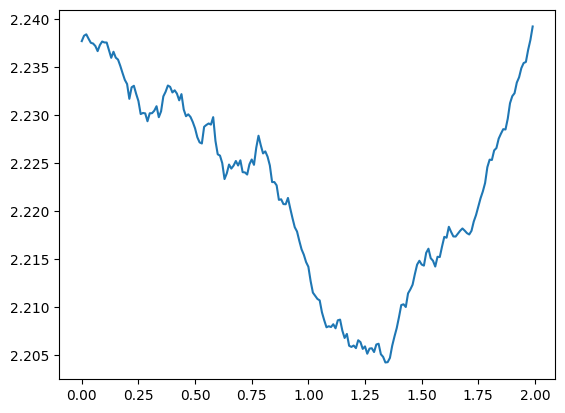

In [57]:
rmse_val = [] #to store rmse values for different k
for epsilon in np.arange(0,2,0.01): 
    svr = SVR(epsilon = epsilon)
    svr.fit(X_train, y_train)  #fit the model
    pred=svr.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values

plt.plot(np.arange(0,2,0.01), rmse_val)

In [58]:
import plotly.express as px

In [59]:
svrdata = {'Epsilon': np.arange(0,2,0.01), 'RMSE with SVR': rmse_val}
svrdf = pd.DataFrame(svrdata)
fig = px.line(svrdf, x="Epsilon", y="RMSE with SVR", title='SVR Epsilon v/s Cost')
fig.show()

In [60]:
svr = SVR(epsilon=1.35)
svr.fit(data, target)
submission['Target'] = svr.predict(test)
submission.to_csv('Sub1.csv', index=False)

# KNN Hyperparameter Tuning

In [61]:
rmse_val = [] #to store rmse values for different k
for K in range(50):
    K = K+1
    model = KNeighborsRegressor(n_neighbors = K, weights='distance', algorithm="brute")

    model.fit(X_train, y_train)  #fit the model
    pred=model.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values

In [62]:
knndata = {'K': np.arange(50)+1, 'RMSE with KNN': rmse_val}
knndf = pd.DataFrame(knndata)
fig = px.line(knndf, x="K", y="RMSE with KNN", title='Cost v/s KNN K')
fig.show()

In [63]:
# prediction with weights = distance and K = 12
model = KNeighborsRegressor(n_neighbors =22, weights='distance', algorithm="brute")
model.fit(data, target)  #fit the model
submission['Target'] = model.predict(test)
submission.to_csv('Sub1.csv', index=False)

# Random Forest Regression

In [64]:
from sklearn.ensemble import RandomForestRegressor

In [65]:
rf = RandomForestRegressor(n_estimators = 300, max_features = 'sqrt',max_leaf_nodes=28, random_state = 0).fit(X_train, y_train)

In [66]:
pred=rf.predict(X_test) #make prediction on test set
error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse

In [67]:
error

2.1654422962947217

In [68]:
rf.fit(data, target)
submission['Target'] = rf.predict(test)
submission.to_csv('Sub1.csv', index=False)

# Gradient Boosting Regression

In [69]:
from sklearn import ensemble
params = {
    "n_estimators": 500,
    "max_depth": 4,
    "min_samples_split": 5,
    "learning_rate": 0.01,
    "loss": "squared_error",
}

In [70]:
reg = ensemble.GradientBoostingRegressor(**params)
reg.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.01, max_depth=4, min_samples_split=5,
                          n_estimators=500)

In [71]:
rmse = np.sqrt(mean_squared_error(y_test, reg.predict(X_test)))
print("The root mean squared error (MSE) on test set: {:f}".format(rmse))

The root mean squared error (MSE) on test set: 2.044868


In [72]:
#That's pretty good, not sure if it overfits though

In [73]:
reg.fit(data, target)
submission['Target'] = reg.predict(test)
submission.to_csv('Sub1.csv', index=False)

# Tomorrow Try:
1) Neural Network Regression
2) Hyperparameter tuning of Gradient Boosting Regressor
3) Elastic Net Regressor
4) Start Making Submission Report

# Neural Network Regression

In [93]:
from sklearn.neural_network import MLPRegressor

In [120]:
nnr = MLPRegressor(random_state=1, max_iter=1000, alpha=0.0002)
nnr.fit(X_train, y_train)

MLPRegressor(alpha=0.0002, max_iter=1000, random_state=1)

In [121]:
np.sqrt(mean_squared_error(y_test, nnr.predict(X_test)))

2.000501442971003

In [122]:
#Hmm
#to overfit or not to overfit

In [123]:
nnr.fit(data, target)
submission['Target'] = nnr.predict(test)
submission.to_csv('Sub1.csv', index=False)

In [124]:
#best score obtained: 2.21225

# Elastic Net regression

In [126]:
from sklearn.linear_model import ElasticNet

In [127]:
enr = ElasticNet(random_state=10)

In [129]:
enr.fit(X_train, y_train)
np.sqrt(mean_squared_error(y_test, enr.predict(X_test)))

2.970584707919777

In [130]:
#not even gonna try that

# tuning GBR

In [137]:
rmse_val = [] #to store rmse values for different k
for K in np.arange(1,10):
    params = {
    "n_estimators": 500,
    "max_depth": K,
    "min_samples_split": 5,
    "learning_rate": 0.01,
    "loss": "squared_error",
    }
    reg = ensemble.GradientBoostingRegressor(**params)
    reg.fit(X_train, y_train)
    pred=reg.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values

In [138]:
gbrdata = {'max_depth': np.arange(1,10), 'RMSE with GBR': rmse_val}
gbrdf = pd.DataFrame(gbrdata)
fig = px.line(gbrdf, x="max_depth", y="RMSE with GBR", title='Cost v/s GBR max_depth')
fig.show()

In [140]:
#5

In [152]:
params = {
    "n_estimators": 500,
    "max_depth": 5,
    "min_samples_split": 5,
    "learning_rate": 0.01,
    "loss": "squared_error"
}
gbr = ensemble.GradientBoostingRegressor(**params)
gbr.fit(data, target)
submission['Target'] = gbr.predict(test)
submission.to_csv('Sub1.csv', index=False)

In [162]:
nnr = MLPRegressor(random_state=1, max_iter=1000, alpha=1)
nnr.fit(X_train, y_train)
np.sqrt(mean_squared_error(y_test, nnr.predict(X_test)))

2.032689182774408

In [163]:
nnr.fit(data, target)
submission['Target'] = nnr.predict(test)
submission.to_csv('Sub1.csv', index=False)

In [164]:
#nothing fucking works